# Linear Algebra Project (20MA604)
### **A visual overview of gradient descent based optimizers**

######**Theivaprakasham H (CB.EN.P2CEN20026)**

---





Gradient descent is one of the most popular algorithms to perform optimization and by far themost common way to optimize neural networks.  At the same time, every state-of-the-art DeepLearning library contains implementations of various algorithms to optimize gradient descent.  These algorithms, however, are often used as black-box optimizers, as practical explanations of their strengths and weaknesses are hard to comeby.


The following Gradient Descent based optimizers are discussed in this project:
* Gradient Descent
* Mini batch gradient descent
* Stochastic Gradient Descent
* Momentum
* Nesterov
* Adagrad
* RMSProp
* Adam

In [2]:
%matplotlib inline

# importing few libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

from mpl_toolkits import mplot3d
from IPython.display import display, HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from tqdm import tqdm_notebook
plt.rc('animation', html='html5')

Synthetically creating points around the line 
$$
y = ax + b
$$
by adding noise to the output. So, effectively,  
$$
y = ax + b + w, \quad where 
$$
$$
w \in N(0, \sigma^2)
$$

In [3]:
#generatiing variables
a = 2
b = 25
sigma = 0.5

x = np.arange(-20, 20, 0.05)                       # 40/0.05 = 800 data points

y = a * x + b + sigma * np.random.randn(x.shape[0])

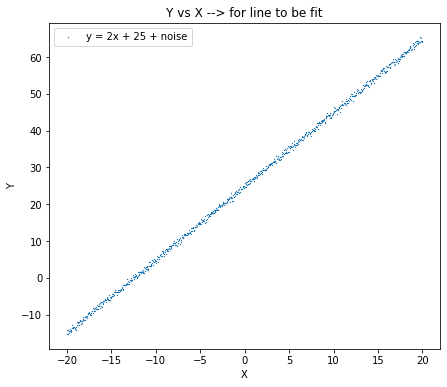

In [4]:
plt.figure(figsize = [7,6])
plt.scatter(x, y, marker='x', s=0.1)
plt.title('Y vs X --> for line to be fit')
plt.xlabel('X'); plt.ylabel('Y')
plt.legend( ['y = ' + str(a) + 'x + ' + str(b) +' + noise'])

In [5]:
# Compute loss for single a,b or a full grid of them 
def compute_loss(a_est, b_est):
    return np.mean(np.square(y - (a_est * x + b_est)),2)

In [6]:
#l. The main goal is to visualize the loss function for all values of a and b.
a_explore_range = 20
a_explore_step = 0.1

# Since b has less impact on loss function, moving to larger values
b_explore_range = 200
b_explore_step = 1

# We can change above values to see how the parameters impact the model

# Get full ranges of a and b
a_est_range = np.arange(a - a_explore_range, a + a_explore_range, a_explore_step)
b_est_range = np.arange(b - b_explore_range, b + b_explore_range, b_explore_step)

# Make them into a grid. b first, as we want a to change along rows
bgrid, agrid = np.meshgrid(b_est_range, a_est_range)

size_x = np.int(a_explore_range / a_explore_step * 2)
size_y = np.int(b_explore_range / b_explore_step * 2)
agrid_tiled = np.tile(np.reshape(agrid, [size_x, size_y, 1]), [1,1,x.shape[0]])
bgrid_tiled = np.tile(np.reshape(bgrid, [size_x, size_y,1]), [1,1,x.shape[0]])


loss_full_grid = compute_loss(agrid_tiled, bgrid_tiled)

a0_range = np.linspace(-10,30,50)
a1_range = np.linspace(-10,30,50)
xx,yy = np.meshgrid(a0_range,a1_range)
loss_mesh = compute_loss(agrid_tiled, bgrid_tiled)


X = np.ones((800,2))
X[:,0] = x

In [7]:
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x, y, c='orange', label='Ground truth')
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')


# plot loss 
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(agrid, bgrid, loss_full_grid, cmap='viridis', alpha=0.8)
a = np.array([2,25])
ax1.plot3D([a[0]], [a[1]], [0], c='r', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=1, label='loss')
ax1.set_xlabel('a0'); ax1.set_ylabel('a1'); ax1.set_zlabel('Loss')
ax1.view_init(50, 70)
ax1.legend()


# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='a0')
line3, = ax2.plot([],[], label='a1')
ax2.set_ylim(0, 30)
ax2.set_xlim(0, 200)
ax2.set_xlabel('iterations')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 300)

ax2.legend((line2, line3, line4), ('a0', 'a1', 'loss'), loc='center right')


fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i,s):
    line0.set_data(X[:,0], (X.dot(rec_wgts[i])))
    line1.set_data(rec_wgts[:i+1,0], rec_wgts[:i+1,1])
    line1.set_3d_properties(rec_loss[:i+1])

    epochs = np.arange(i+1)
    if s == 'Batch Gradient Descent' : epochno = i
    elif s == 'Stochastic Gradient Descent' : epochno = int(i/num_samples) + 1
    else : epochno = int(i/10) + 1
    ttl = fig.suptitle(f'{s}\n epoch number: = {epochno}', fontsize=20)
    line2.set_data(epochs, rec_wgts[:i+1, 0])
    line3.set_data(epochs, rec_wgts[:i+1, 1])
    line4.set_data(epochs, rec_loss[:i+1])
    return line0, line1, line2, line3, line4, ttl


The data is shown above. It is basically a line with some gaussian noise added. Here we know the true value of the parameters of the line, i.e. a and b. 


In a supervised learning problem setting, the task would be to determine a and b. We start with some initial pair (a,b) and moving as per the directions of the optimizer till we find the value of (a,b) minimizes the mean squared error over all data points (global minima) or a batch of data points (local minima). 

The loss function can be expressed as: 
$$
J = \frac{1}{2}\sum_{i=1}^n(y_i - (a x_i + b) )^2 
$$
$$
(a_{opt}, b_{opt}) = \underset{a,b}{\mathrm{argmin}} (J)
$$


### The loss function

Observe the loss function across a grid of different parameter values. The blue curve at any point is the loss for a particular set of parameters(a,b) as shown in the figure. Notice how the decline or rise in loss is much steeper when changing a as compared to changing b. This is even more evident in the plots shown below.

Some optimizers have trouble navigating along such loss functions as we'll observe. Also, this curve is obviously convex, and a very clean one at it. Do not expect such clean loss functions in real life.  

In [8]:
# Compute loss for single a,b or a full grid of them 
def compute_loss(a_est, b_est):
    return np.mean(np.square(y - (a_est * x + b_est)),2)

Text(0.5, 1.0, 'Mean loss values across for different b values')

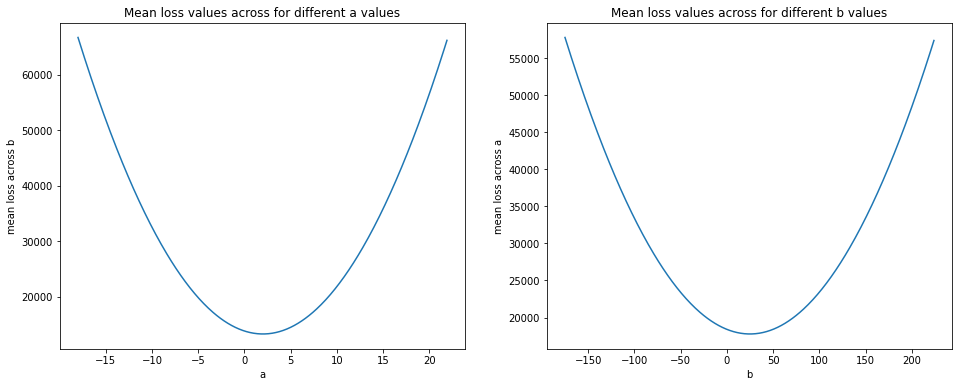

In [9]:
plt.figure(figsize = [16,6])
plt.subplot(121)
plt.plot(a_est_range, np.mean(loss_full_grid, axis=1))
plt.xlabel('a')
plt.ylabel('mean loss across b')
plt.title('Mean loss values across for different a values')
plt.subplot(122)
plt.plot(b_est_range, np.mean(loss_full_grid, axis=0))
plt.xlabel('b')
plt.ylabel('mean loss across a')
plt.title('Mean loss values across for different b values')

### Linear regression problem mathematical formulation

We are trying to fit the line 
$$
y = ax + b
$$
or in other words minimize the loss function
$$
J = \frac{1}{2}\sum_{i=1}^n(y_i - (a x_i + b) )^2 
$$
$$
J = \frac{1}{2}\sum_{i=1}^n (y_i^2 + (a x_i)^2 + b^2 + 2ax_ib - 2ax_iy_i - 2y_ib)
$$

We can generalize above equation, here we can see that loss is a function of just 2 parameters $a$ and $b$. So let's say $\theta = [a,b]$, then the loss is $ J(\theta) $. From here on, $\theta$ is the set of parameters to be updated.

### Direct solution - pseudo inverse

Pseudo inverse of the features matrix x multiplied with y gives the solution to this mean squared minimization or regression problem directly. This can be expressed as :
$$
   Y= XA 
$$

$$
A = (X^T X)^{-1}X^T Y
$$

where $X$ is the features set with a column of 1's appended for the bias value computation 

In [10]:
x_ext  = np.expand_dims(x, axis=1)
y_ext  = np.expand_dims(y, axis=1)
x_ext  = np.concatenate((x_ext, np.ones_like(x_ext)), 1)

astar, bstar = np.dot(np.dot(np.linalg.inv(np.dot(x_ext.T, x_ext)),x_ext.T),y_ext)
print(astar, bstar)

astar2, bstar2 = np.dot(np.linalg.pinv(x_ext), y_ext)
print(astar2, bstar2)

[1.99886759] [25.01365891]
[1.99886759] [25.01365891]


### Gradients computation
Computing the gradients w.r.t a and b, we have
$$
J = \frac{1}{2}\sum_{i=1}^n(y_i - (a x_i + b) )^2 
$$

$$
\frac{\partial J}{\partial a} = \frac{1}{2}\sum_{i=1}^n (2ax_i^2 + 2x_ib - 2x_iy_i) 
$$

$$
\frac{\partial J}{\partial a} = \sum_{i=1}^n x_i (ax_i + b - y_i )
$$

$$
\frac{\partial J}{\partial b} = \sum_{i=1}^n (ax_i + b - y_i )
$$

$$
\nabla J = ( \frac{\partial J}{\partial a} , \frac{\partial J}{\partial b})
$$

In [11]:
# Gradient calculation
def gradient(x, y, theta):
    a,b = theta[0], theta[1]
    temp_err = a * x + b - y
    loss = sum(temp_err * temp_err)
    grad_a = sum(x * temp_err)
    grad_b = sum(temp_err)
    return np.array([grad_a, grad_b]), loss

# Randomizing the batch
def get_random_batch(x, y, batch_size):
    i = np.random.randint(0, x.shape[0]-1, size = batch_size)
    return(x[i], y[i])

#Plotting results
def plot_all_results(grad_store, abvalue_store, loss_store, velocity_store = None):
    plt.figure(figsize = [20, 12])
    plt.subplot(231)
    plt.plot(grad_store[:,0])
    plt.title('Gradient of loss wrt a'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial a}$')
    plt.subplot(232)
    plt.plot(grad_store[:,1])
    plt.title('Gradient of loss wrt b'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial b}$')
    plt.subplot(233)
    plt.plot(abvalue_store[:,0])
    plt.title('"a" values'); plt.xlabel("# Steps")
    plt.ylabel('a')
    plt.subplot(234)
    plt.plot(abvalue_store[:,1])
    plt.title('"b" values'); plt.xlabel("# Steps")
    plt.ylabel('b')
    plt.subplot(235)
    plt.plot(loss_store)
    plt.title("Loss"); plt.xlabel("# Steps")
    plt.ylabel('loss')
    if velocity_store is not None:
        plt.subplot(236)
        plt.plot(velocity_store[:, 0])
        plt.plot(velocity_store[:, 1], 'r*')
        plt.legend(['Velocity of grad_a', 'Velocity of grad_b'])

#Initializing some numpy arrays
def init_data_store(num_epochs):
    grad_store = np.zeros([num_epochs, 2], dtype=float)
    abvalue_store = np.zeros([num_epochs, 2], dtype=float)
    loss_store = np.zeros([num_epochs, 1], dtype=float)
    velocity_store = np.zeros([num_epochs, 2], dtype=float)
    
    return grad_store, abvalue_store, loss_store, velocity_store

# Shuffle the Dataset
ix = np.arange(0,x.shape[0])
np.random.shuffle(ix)
x = x[ix]
y = y[ix]

#getting the batch of data for passed indices
def get_data_from_batch(x,y,idx,batch_size):
    start_ix = idx*batch_size
    end_ix   = min(start_ix + batch_size, x.shape[0])
    return (x[start_ix:end_ix], y[start_ix:end_ix])

### Batch Gradient Descent

* Simplest of all optimizers
* Just one parameter - learning rate (denoted by $\eta$)
* Move in the direction opposite of the gradient
* Guaranteed to converge to global optimum (convex function) and local optimum otherwise


**Update rule**
$$
\theta_t = \theta_{t-1} - \eta \cdot \nabla J(\theta_{t-1})
$$

**Cons**
* Memory intensive - loads the full dataset and computes gradients


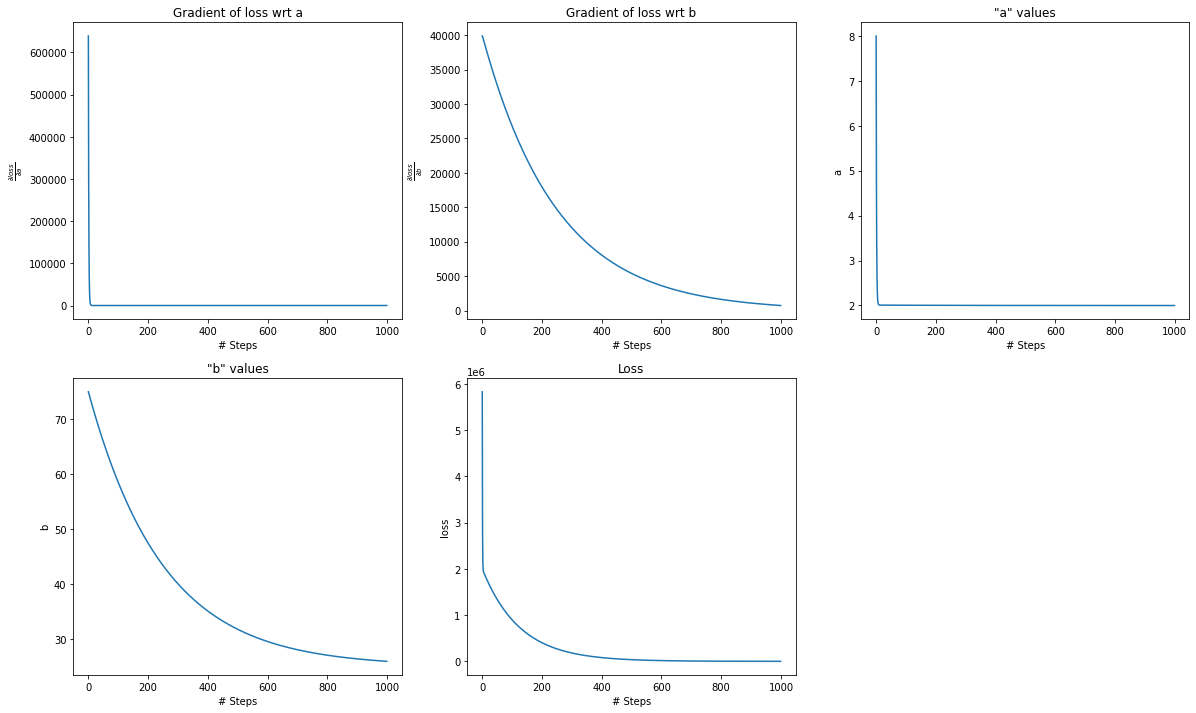

In [12]:
# Batch gradient descent

initial_a = 8
initial_b = 75
num_epochs = 1000
eta = 5e-6

grad_store, abvalue_store, loss_store, _ = init_data_store(num_epochs)

theta = np.array([initial_a, initial_b])

for i in range(num_epochs):
    abvalue_store[i,:] = theta
    
    #calculate gradient
    grad, loss = gradient(x,y, theta)
    
    #update rule
    delta_theta = eta * grad
    theta = theta - delta_theta
    
    # storing them to display later
    grad_store[i] = grad
    loss_store[i] = loss
    
plot_all_results(grad_store, abvalue_store, loss_store)

In [13]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Batch Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Mini batch gradient descent

This is the same as above gradient descent, except that the update is performed on a mini batch of user specified size. 

* Less memory intensive
* Noisy convergence
* More commonly used in neural nets/ problems that don't fit in memory


**Update rule** 
$$
\theta_t = \theta_{t-1} - \eta \cdot \nabla J_{batch}(\theta_{t-1})
$$

where $J_{batch}$ is the loss over the mini batch under process

**Observation**
* Noisy convergence.
* When batch size increases, the Noise of convergence reduces

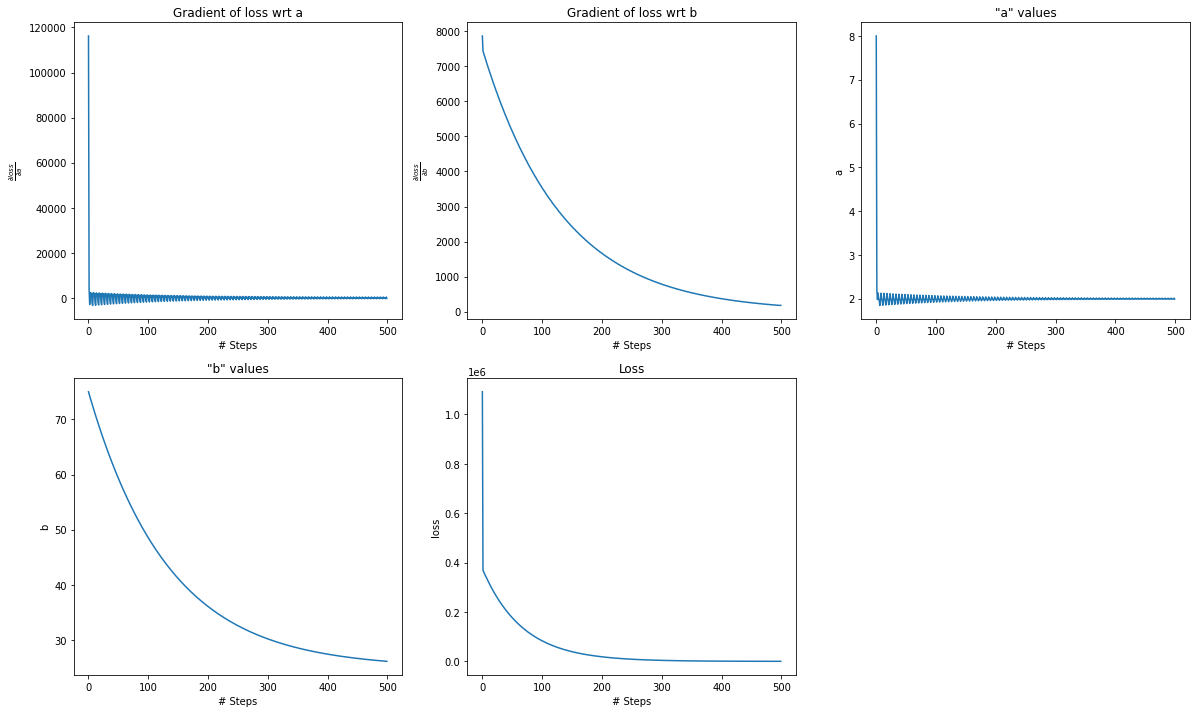

In [14]:
# Mini batch gradient descent

initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 150
n_batches = int(x.shape[0]/batch_size)

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        #calculate gradient
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # update parameters
        theta = theta - eta * grad
        
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)

In [15]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Mini Batch Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Stochastic gradient descent

This is the same as above gradient descent, except that the update is performed on each of the data and back propogation performed simultaneously. 

* Less memory intensive
* Noisy convergence
* Relatively fast compared to the older gradient descent approaches

**Cons**
* Converges slower than newer algorithms
* Has more problems with being stuck in a local minimum than newer approaches
* Newer approaches outperform SGD in terms of optimizing the cost function

**Update rule** 
$$
\theta = \theta_{t-1} - \eta \cdot 
    \nabla J(\theta_{t-1})
$$

where $J_{batch}$ is the loss over the mini batch under process

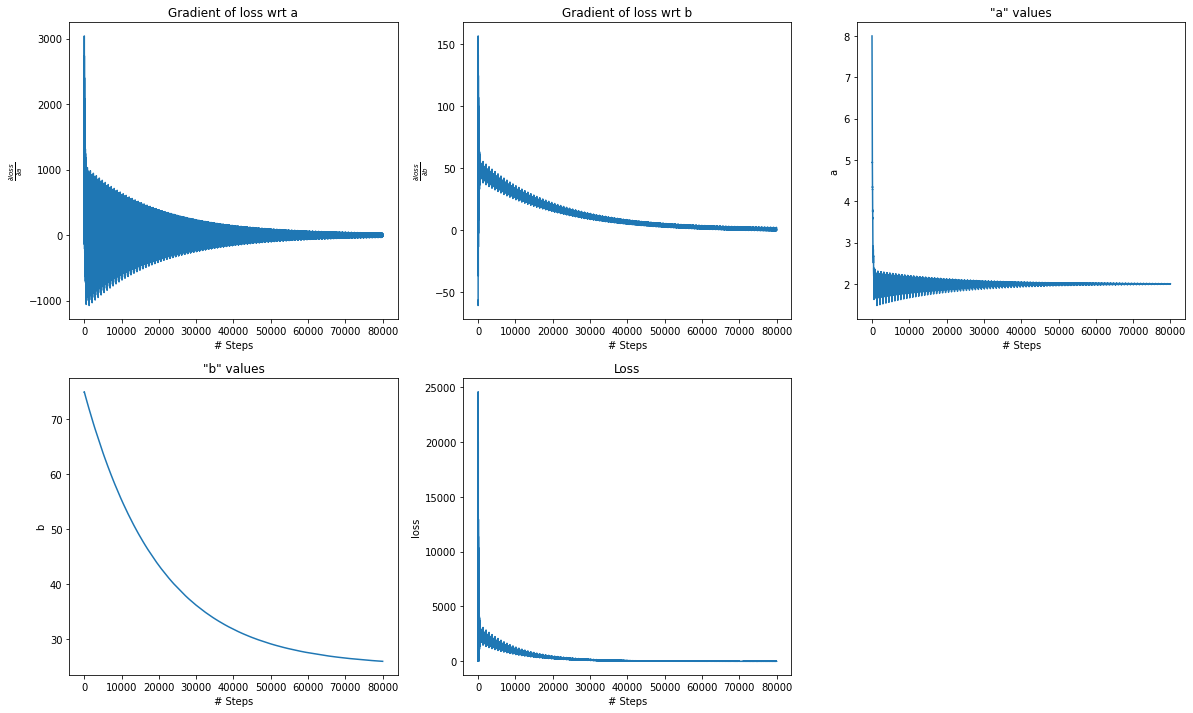

In [13]:
# Stochastic gradient descent

initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 1 
n_batches = int(x.shape[0]/batch_size)

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        #calculate gradient
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # update parameters
        theta = theta - eta * grad
        
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)

In [ ]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Stochastic-Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

### Momentum

Momentum is where we add a temporal element into our equation for updating the parameters of a neural network – that is, an element of time. This time element increases the momentum by gamma γ which is usually initialized to 0.9. But we also multiply that by the previous update vt

Momentum is basically the same as SGD, with an extra term:

$$
\theta_t = \theta_{t-1} - v_t
$$


$$
v_t = \gamma v_{t-1} + \eta \nabla J(\theta_{t-1})
$$


We can write this equation like this instead
$$
\theta_t = \theta_{t-1} - \eta\nabla J(\theta_{t}) + \gamma \sum_{\tau=1}^{t}
    \eta\nabla J(\theta_{\tau})
$$
**Pros**

* Faster convergence than traditional SGD



**Cons**

 * Sometime, we miss local minima as the acceleration is high but if the momentum is too much, we could just swing back and forward between the local minima.

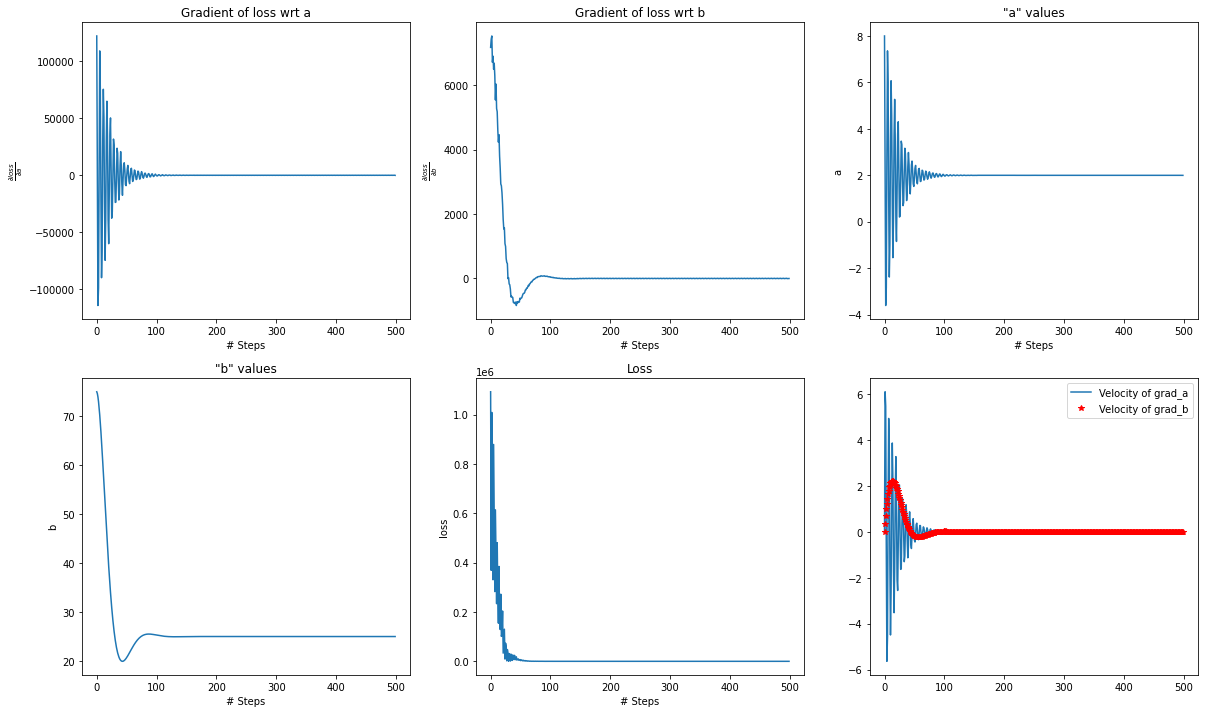

In [17]:
initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
gamma = 0.9

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)


theta = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        velocity_store[i] = velocity
        
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        # calculate gradient
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # update rule
        velocity = gamma* velocity + eta * grad
        theta = theta - velocity
        
        # store
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store, velocity_store)

In [17]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Momentum Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Nesterov

To prevent the weights from sliding up the other slope with all the momentum it gained while coming down, We calculate the gradiant of the point at the look ahead point $\nabla J(\theta_{t-1} - \gamma v_{t-1})$.



$$
v_t = \gamma v_{t-1} + \eta \nabla J(\theta_{t-1} - \gamma v_{t-1})
$$

$$
\theta_t = \theta_{t-1} - v_t
$$

**Pros**

* Faster convergence than traditional Momentum Gradiant Descent
* Reduced Oscillations

**Cons**

 * When gamma value is high, the loss swing back and forward between the local minima.

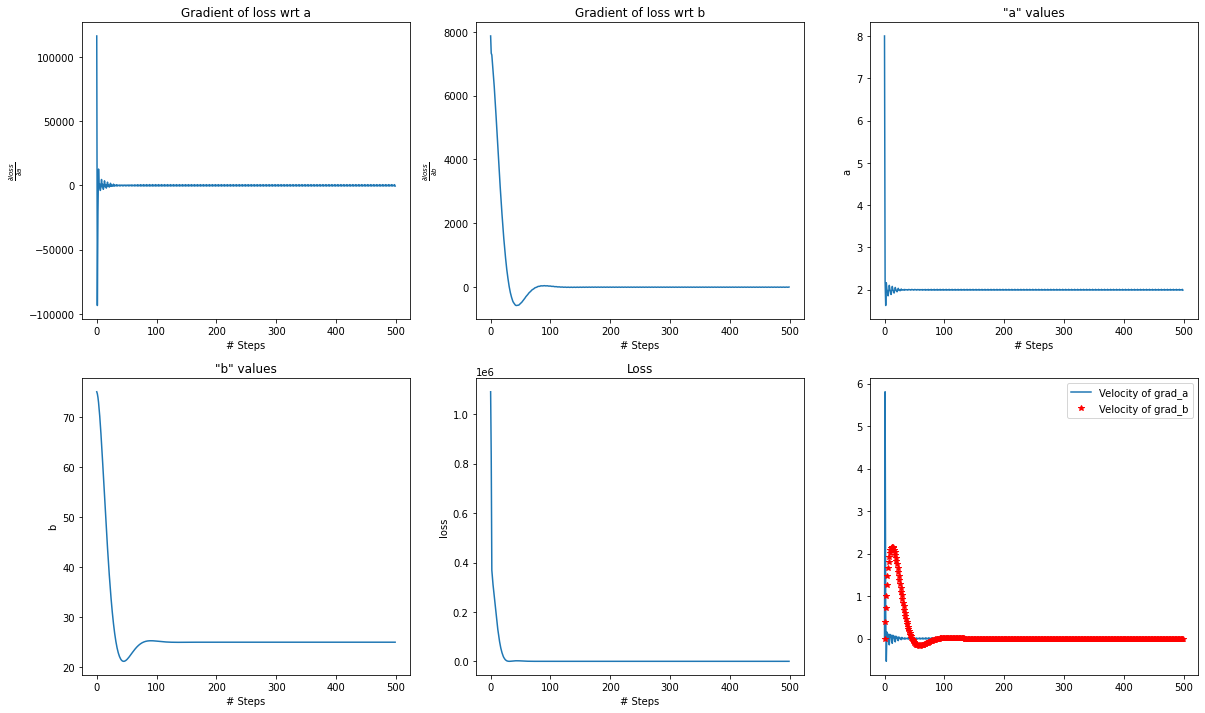

In [18]:
initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
gamma = 0.9

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        velocity_store[i] = velocity
        
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        # computing gradient at lookahead theta
        look_ahead_theta = theta - gamma*velocity
        grad, loss = gradient(x_batch, y_batch, look_ahead_theta)
        
        # update the params
        velocity = gamma* velocity + eta * grad
        theta = theta - velocity
        
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store, velocity_store)

In [19]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Nesterov Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Adagrad

**One Learning rate doesnt fit all.**

Adagrad is an algorithm for gradient-based optimization that does just this: It adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data.

$$
\theta_{t,i} = \theta_{t-1,i} - \frac{\eta }{\sqrt{G_{\tau,i} + \epsilon}} \cdot \nabla J(\theta_{t-1,i})
$$

$$
G_{\tau,i} =  \sum_{\tau=1}^{t}
            \left( \nabla J(\theta_{\tau,i}) \right) ^2
$$


where $G_{\tau,i} \in R^{d×d}$ is a diagonal matrix where each diagonal element i, i is the sum of the squares of the
gradients w.r.t. the parameter up to time step $t$, while $\epsilon$ is a smoothing term that avoids division by zero (usually
on the order of 1e-8)

**Cons**
* Loss reduces at a faster rate but loss gets slower and slower to converge as the learning rate decreases as the acculamated sum of gradients increase over a period of time.


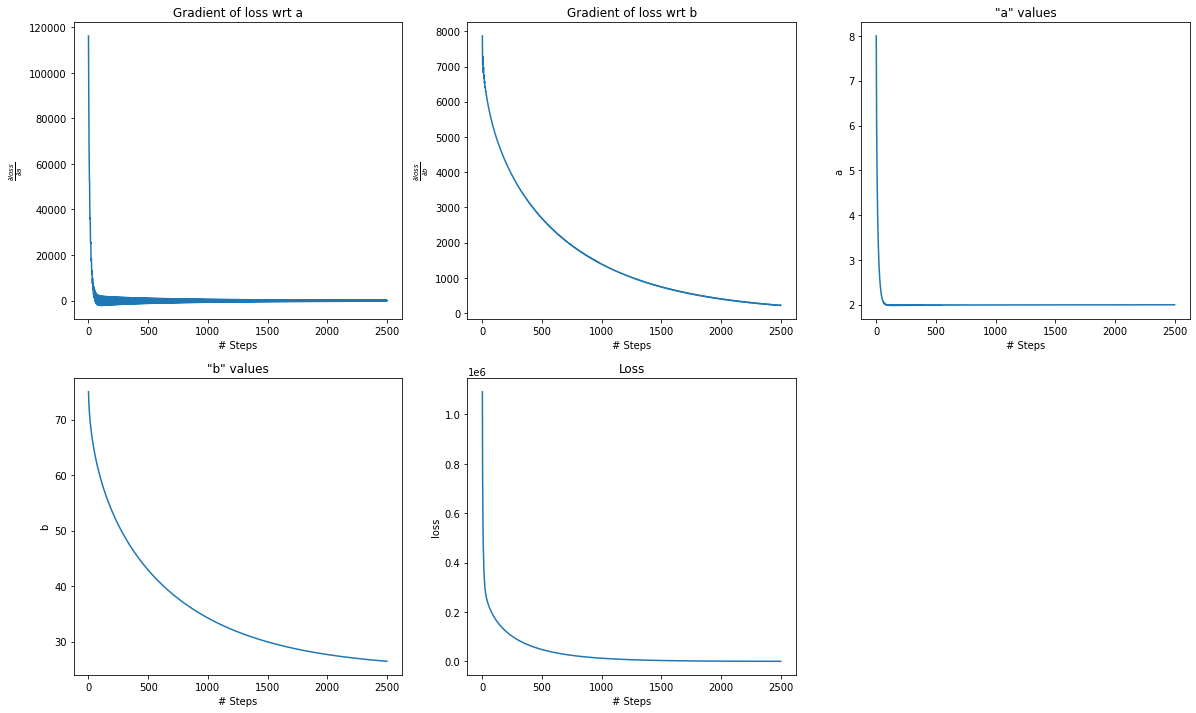

In [20]:
initial_a = 8
initial_b = 75
num_epochs = 500
eta = 0.9
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
eps = 1e-8

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        
        # get the batch
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        # Compute the gradient
        grad, loss = gradient(x_batch, y_batch, theta)
        grad_store[i] = grad
        
        # Compute G and update params
        G = np.sum(np.square(grad_store), axis=0)
        theta = theta - eta * grad / np.sqrt(G + eps)
        
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)

In [21]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Adagrad Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Adadelta / (RMSProp)

Adadelta is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, Adadelta restricts the growth by calculating the exponentially decaying average by introducing a momentum term $\gamma.

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g^2_t $$ where $g_t = \nabla J(\theta)$

$$
\theta_{t,i} = \theta_{t-1,i} - \frac{\eta }{\sqrt{E[g^2]_{t,i} + \epsilon}} \cdot \nabla J(\theta_{t-1,i})
$$



**Pros**
* Oscillation reduced to a greater extent compared to Adagrad
* Faster convergence compared to Adagrad


**Cons**
* Loss reduces at a faster rate but loss gets slower and slower to converge as the learning rate decreases as the it exponentially increase over a period of time.

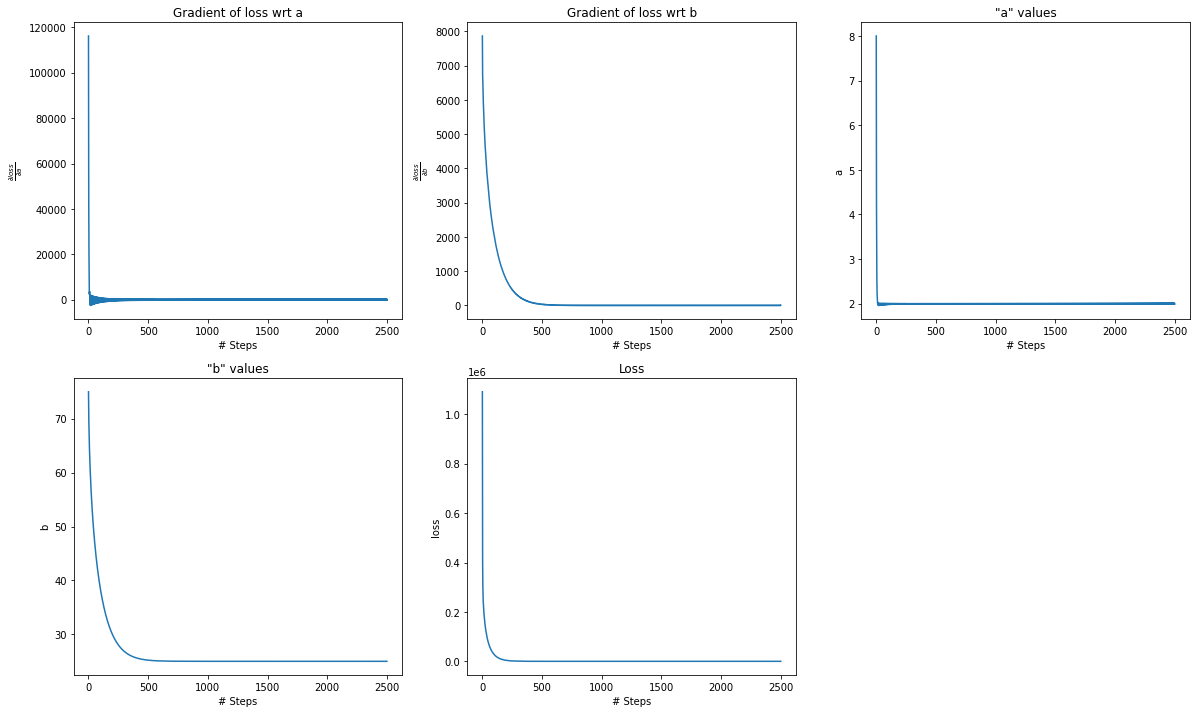

In [22]:
initial_a = 8
initial_b = 75
num_epochs = 500
eta = 8e-2
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
eps = 1e-8
gamma = 0.999

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
i=0
expected_grad = np.array([0,0])
for epoch in range(num_epochs):
    
    for batch_idx in range(n_batches):
        
        abvalue_store[i] = theta
        
        # get the data and compute gradient 
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # compute update rule
        expected_grad = gamma * expected_grad + (1 - gamma) * np.square(grad)
        RMS_grad = np.sqrt(expected_grad + eps)
        delta_theta = -(eta/RMS_grad) * grad
        
        theta = theta + delta_theta
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)

In [23]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "RMSProp Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Adam

Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients $v_t$ like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients $m_t$, similar to momentum

here $g_t = \nabla J(\theta)$
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t
$$

$$
v_t = \beta_2v_{t-1} + (1 - \beta_2)g^2_t 
$$

$$
\hat{m_t} = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v_t} = \frac{v_t}{1 - \beta_2^t}
$$

$$ \theta_{t} = \theta_{t-1} - \frac{\eta }{\sqrt{\hat{v}_{t-1} + \epsilon}} \cdot \hat{m}_{t-1} $$

CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 229 ms


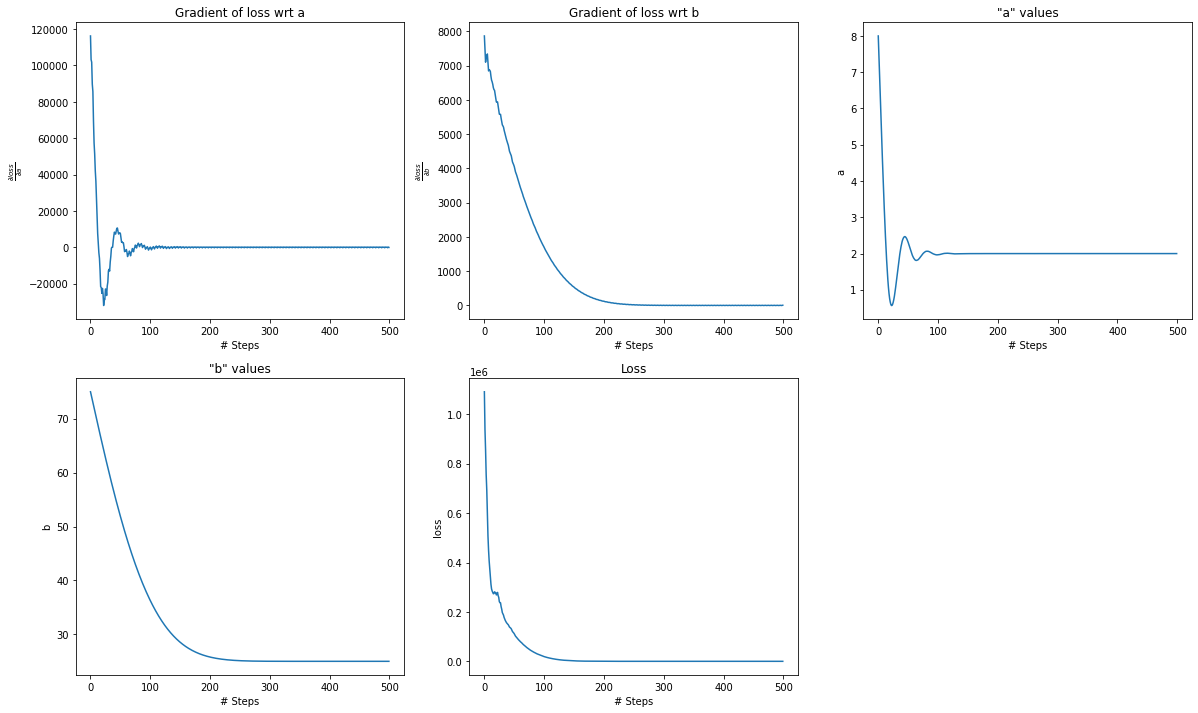

In [24]:
%%time
initial_a = 8
initial_b = 75
num_epochs = 100
epsilon = 1e-8
theta = np.array([initial_a, initial_b])
beta1 = 0.9
beta2 = 0.999
batch_size = 150
eta = 5e-1
n_batches = int(x.shape[0]/batch_size)
grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)


mt = np.array([0, 0])
vt = np.array([0, 0])

i=0
for epoch in range(num_epochs):
    
    for batch_idx in range(n_batches):
        
        abvalue_store[i] = theta
        
        # get data and compute gradient
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        grad, loss = gradient(x_batch, y_batch, theta)

        # approximate first and second moment
        mt = beta1 * mt + (1 - beta1) * grad
        vt = beta2 * vt + (1 - beta2) * np.square(grad)
    
        # bias corrected moment estimates
        mhat = mt / (1 - beta1 ** (i+1) )
        vhat = vt / (1 - beta2 ** (i+1) )
        
        # update the params
        delta_theta = -1 * eta * mhat/(np.sqrt(vhat) + epsilon)
        theta = theta + delta_theta
        
        grad_store[i,:] = grad
        loss_store[i] = loss
        i += 1
        
plot_all_results(grad_store, abvalue_store, loss_store)

In [25]:
rec_loss = loss_store.squeeze()
rec_wgts = abvalue_store
s = "Adam Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(loss_store))), interval=30,fargs=[s])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.
